# **Packages Imports**

In [34]:
import pandas as pd

# **Creation of the Dataframe**

In [35]:
# sep ----> Standard: ','
# low_memory ----> Standard: True -----> False | used when the archive has high data

df =  pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

# **Exploratory Data Analysis**

In [36]:
df.shape
print(f'The dataframe has {df.shape[0]} registries and {df.shape[1]} attributes')

The dataframe has 2075259 registries and 9 attributes


In [37]:
# Showing the first 10 registries
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **Global_active_power and Global_reactive_power**

**Global_active_power** = É a potência que é consumida e transformada em trabalho útil como:

*   Iluminar uma lâmpada
*   Aquecer uma resistência
*   Girar um motor de máquina

-------


**Global_reactive_power** = Ela não realiza trabalho útil diretamente, É a potência que oscila entre a fonte e a carga devido a campos magnéticos (indutores, motores, transformadores) ou elétricos (capacitores), Embora não produza trabalho, é necessária para manter o funcionamento de dispositivos eletromagnéticos (motores, bobinas, transformadores).





In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [46]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
Dia_Semana,0


In [48]:
perc = 100 * (25979 / df.shape[0])

print(f'O percentual de registros ausentes é de {perc: .3f}%')

O percentual de registros ausentes é de  1.252%


In [39]:
# Isolando as colunas que não quero tornar em numéricos
colunas_excluir = ["Date", "Time"]

# Converter todas as outras colunas para numérico
for col in df.columns:
    if col not in colunas_excluir:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [41]:
# Convertendo a coluna data para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

In [59]:
# Converter Time de string para timedelta
df["Time"] = pd.to_timedelta(df["Time"])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    float64        
 3   Global_reactive_power  float64        
 4   Voltage                float64        
 5   Global_intensity       float64        
 6   Sub_metering_1         float64        
 7   Sub_metering_2         float64        
 8   Sub_metering_3         float64        
 9   Dia_Semana             object         
dtypes: datetime64[ns](1), float64(7), object(1), timedelta64[ns](1)
memory usage: 172.0+ MB


In [61]:
# Criando a nova coluna com o dia da semana correspondente
df["Dia_Semana"] = df["Date"].dt.day_name()

In [62]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday
5,2006-12-16,0 days 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,Saturday
6,2006-12-16,0 days 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,Saturday
7,2006-12-16,0 days 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,Saturday
8,2006-12-16,0 days 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,Saturday
9,2006-12-16,0 days 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,Saturday


In [63]:
# Excluir registros ausentes
df = df.dropna()

In [64]:
# Quantificar registros ausentes (NaN e/ou nulos)
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Dia_Semana,0


**Filtrando registros de 2007 e calculando a média de consumo diário**

In [65]:
# Filtrar apenas o ano de 2007
df_2007 = df[df["Date"].dt.year == 2007]

In [66]:
# Agrupar por dia e calcular a média diária
media_diaria = df_2007.groupby(df_2007["Date"].dt.date)["Global_active_power"].mean()

media_diaria

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


### **Criando gráficos**

Utilizando o Seaborn para ver a variação da coluna Global_active_power em um dia

In [67]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
dia_escolhido = pd.to_datetime("01/02/2007")

# Filtrar o DataFrame para esse dia
df_dia = df[df["Date"].dt.date == dia_escolhido.date()]

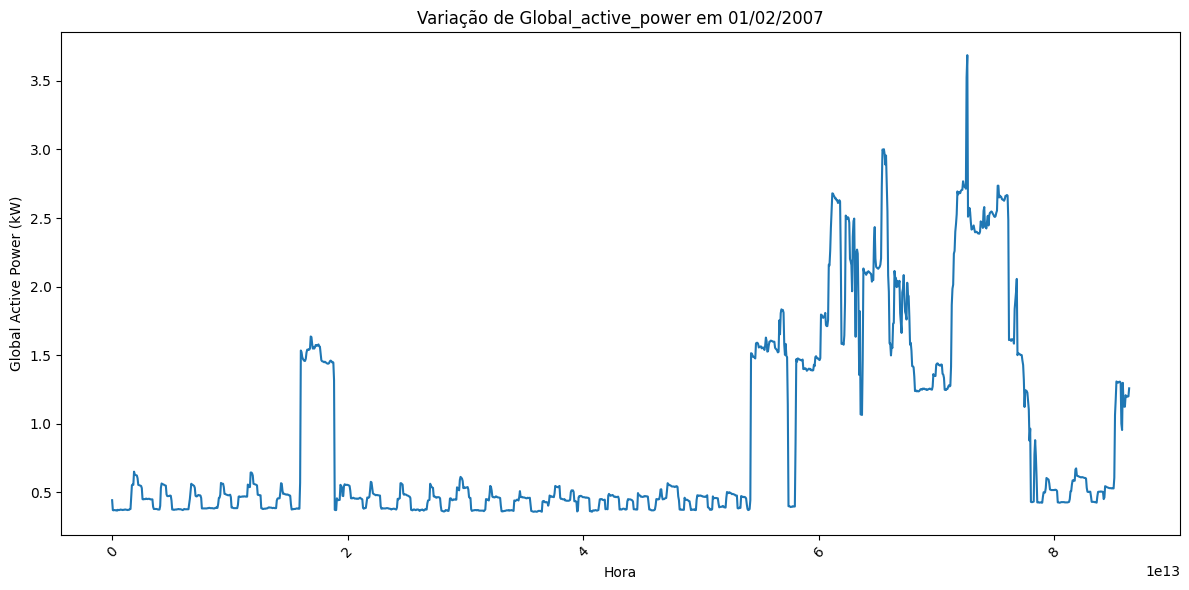

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_dia,
    x="Time",
    y="Global_active_power"
)

plt.xticks(rotation=45)  # Rotaciona os horários para melhor visualização
plt.title("Variação de Global_active_power em 01/02/2007")
plt.xlabel("Hora")
plt.ylabel("Global Active Power (kW)")
plt.tight_layout()
plt.show()

**Histograma de Voltage**

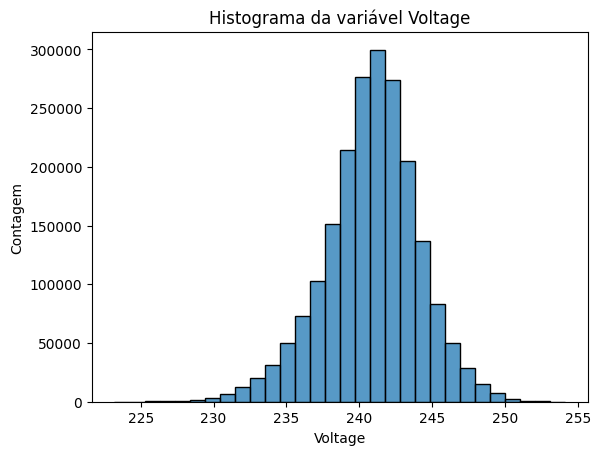

In [70]:
# Plotando o histograma
sns.histplot(data=df, x="Voltage", bins=30, kde=False)  # bins ajusta a quantidade de barras
plt.title("Histograma da variável Voltage")
plt.xlabel("Voltage")
plt.ylabel("Contagem")
plt.show()

<Axes: xlabel='Voltage', ylabel='Count'>

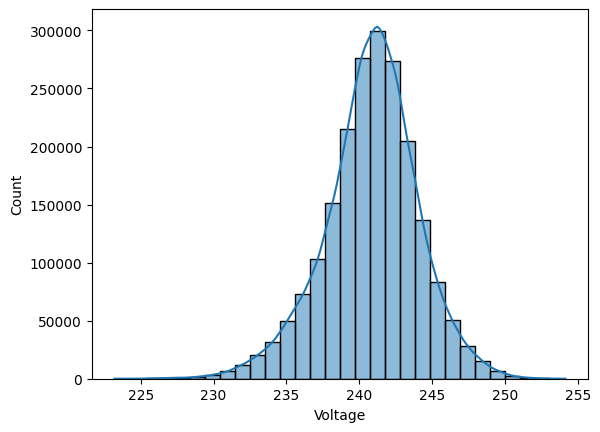

In [72]:
sns.histplot(data=df, x="Voltage", bins=30, kde=True)

O histograma indica que a tensão (Voltage) se mantém muito estável em torno de 240 V, com pouca variação, o que é típico de medições residenciais ou industriais com boa regulação.

**Calculando a média mensal do período**

In [73]:
media_mensal = df.groupby(df["Date"].dt.to_period("M"))["Global_active_power"].mean().reset_index()
media_mensal.rename(columns={"Global_active_power": "Media_Global_Active_Power"}, inplace=True)
print(media_mensal)

       Date  Media_Global_Active_Power
0   2006-12                   1.901295
1   2007-01                   1.546034
2   2007-02                   1.401084
3   2007-03                   1.318627
4   2007-04                   0.891189
5   2007-05                   0.985862
6   2007-06                   0.826814
7   2007-07                   0.667367
8   2007-08                   0.764186
9   2007-09                   0.969318
10  2007-10                   1.103911
11  2007-11                   1.294473
12  2007-12                   1.626474
13  2008-01                   1.459920
14  2008-02                   1.181384
15  2008-03                   1.245337
16  2008-04                   1.115972
17  2008-05                   1.024281
18  2008-06                   0.994096
19  2008-07                   0.794781
20  2008-08                   0.276488
21  2008-09                   0.987680
22  2008-10                   1.136768
23  2008-11                   1.387066
24  2008-12              

In [76]:
# Encontrado o dia com maior consumo ativo
consumo_diario = df.groupby(df["Date"].dt.date)["Global_active_power"].sum()

In [77]:
# Encontrando o dia com maior consumo
dia_max = consumo_diario.idxmax()
valor_max = consumo_diario.max()

print(f"O dia com maior consumo foi {dia_max} com {valor_max:.2f} kW")

O dia com maior consumo foi 2006-12-23 com 4773.39 kW


In [79]:
# weekday(): segunda=0, domingo=6
media_consumo = df.groupby(df['Date'].dt.weekday >= 5)['Global_active_power'].mean()

# Renomear índice para facilitar interpretação
media_consumo.index = ['Dias de semana', 'Finais de semana']

media_consumo

,Global_active_power
Dias de semana,1.035472
Finais de semana,1.234232


É possível notar que há mais gasto de energia durante o final de semana, provavelmente devido a muitas pessoas ficarem em casa durante estes dias.